In [275]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import folium
from folium import plugins

In [276]:
train_df = pd.read_csv('train.csv')

### Analyzing numerical variables and producing summaries

In [277]:
 numeric_data_df = train_df.loc[:,(train_df.dtypes == 'float64')|(train_df.dtypes == 'int64')].set_index('id')
 numeric_data_df   

,budget,popularity,runtime,revenue
id,,,,
1,14000000,6.575393,93.0,12314651
2,40000000,8.248895,113.0,95149435
3,3300000,64.299990,105.0,13092000
4,1200000,3.174936,122.0,16000000
5,0,1.148070,118.0,3923970
6,8000000,0.743274,83.0,3261638
7,14000000,7.286477,92.0,85446075
8,0,1.949044,84.0,2586511
9,0,6.902423,100.0,34327391


In [278]:
medianlist= numeric_data_df.median().reset_index().set_index('index').T
medianlist.rename(index={0:'median'},inplace=True)
summary = numeric_data_df.describe()
pd.concat([summary,medianlist])


index,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09
median,8.000000e+06,7.374861,104.000000,1.680707e+07


c:\users\user\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


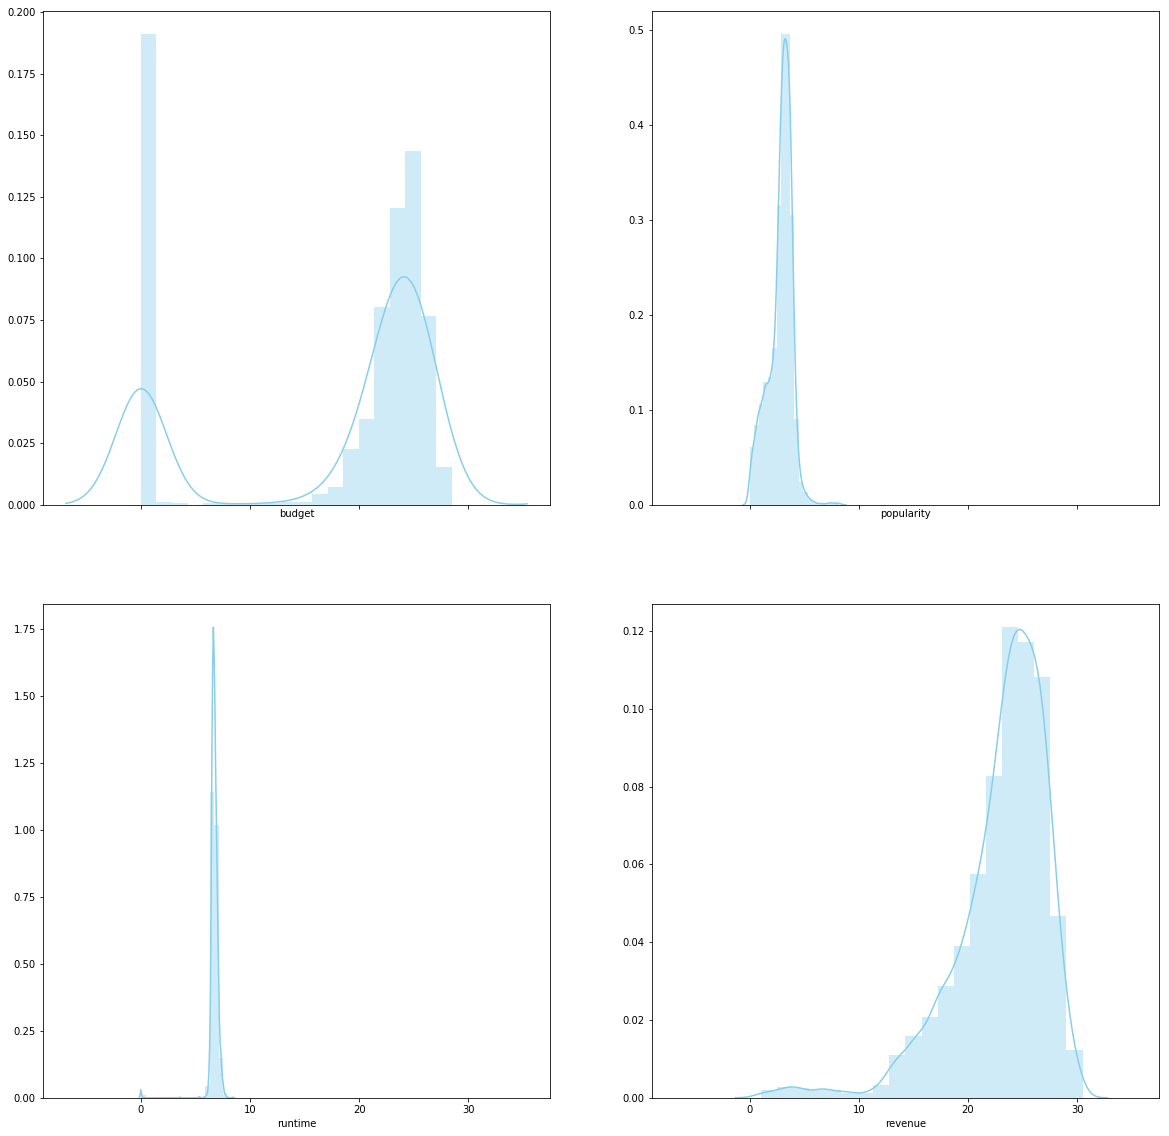

In [279]:
df = numeric_data_df.loc[numeric_data_df.isnull().sum(1) ==0 ,:]
#np.log(df)
f, axes = plt.subplots(2,2,figsize = (20,20),sharex=True)
for i,feature in zip(axes.flat, numeric_data_df.columns):
    sns.distplot( np.log2(df[feature]+1),color = 'skyblue', ax = i, label= feature,bins=20)

,budget,popularity,runtime,revenue
budget,1.000000,0.342200,0.238373,0.752924
popularity,0.342200,1.000000,0.133690,0.461347
runtime,0.238373,0.133690,1.000000,0.216380
revenue,0.752924,0.461347,0.216380,1.000000


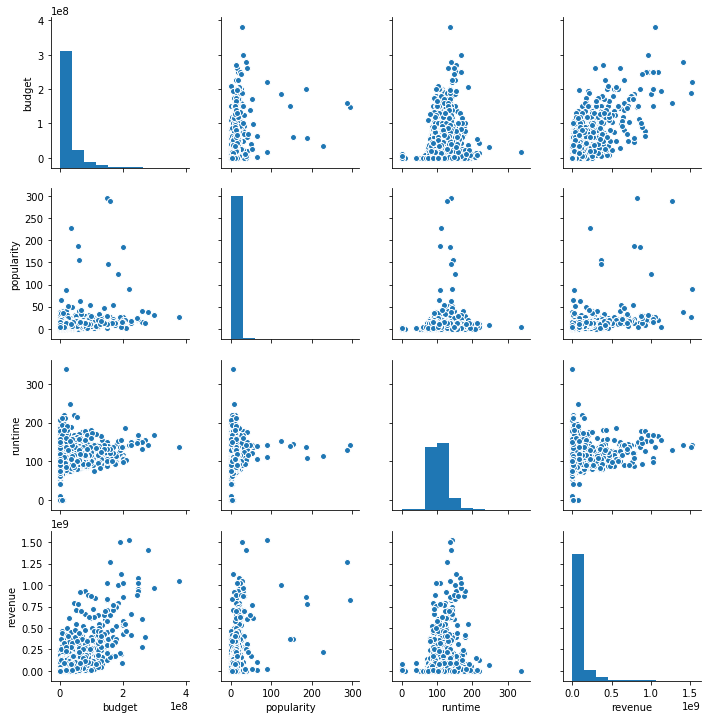

In [280]:
# pair plot
sns.pairplot(df)
# cor
df.corr()
# strong correlation with budget and populatiry.

In [281]:
# unique values
df.apply(lambda x: len(x.unique()))


budget         406
popularity    2997
runtime        139
revenue       2848
dtype: int64

In [282]:
#searching for near zero variance numeric variables.

col_names  = df.columns
container = list()
for i in col_names:
    temp_df = df.loc[:,[i]].assign(Value = 1).groupby(i).agg({'Value':'count'}).sort_values('Value',ascending = False)/len(df)
    container.append(temp_df)
# there is no near zero variance numeric variable   

## Null values 
#### Strategy 
1 visualizing the revenue distribution against attributes with number of null values.
2. Removing or imputing attributes that have null values.

In [283]:
# belong_to_collection and Homepage are the variables with the highest proportion of null values.
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False)/len(train_df)

belongs_to_collection    0.798667
homepage                 0.684667
tagline                  0.199000
Keywords                 0.092000
production_companies     0.052000
production_countries     0.018333
spoken_languages         0.006667
crew                     0.005333
cast                     0.004333
overview                 0.002667
genres                   0.002333
runtime                  0.000667
poster_path              0.000333
dtype: float64

In [10]:
x = 'hello world'
l = x.split(' ')
for i in range(len(l)):
    l[i] = l[i][0].upper() + l[i][1:]
' '.join(l)

'Hello World'

In [284]:
# examining null values variables belongs_to_collection
# creating a new variables
train_df['is_in_collection'] = train_df.belongs_to_collection.map(lambda x: 1 if type(x) == str else 0 )
train_df.loc[train_df.homepage.isnull(),'homepage']  = 'no_homepage'
train_df['has_homepage'] = train_df.homepage.map(lambda x: 0 if x == 'no_homepage'else 1 )
train_df['has_tagline'] = train_df.tagline.map(lambda x: 1 if type(x) == str else 0)

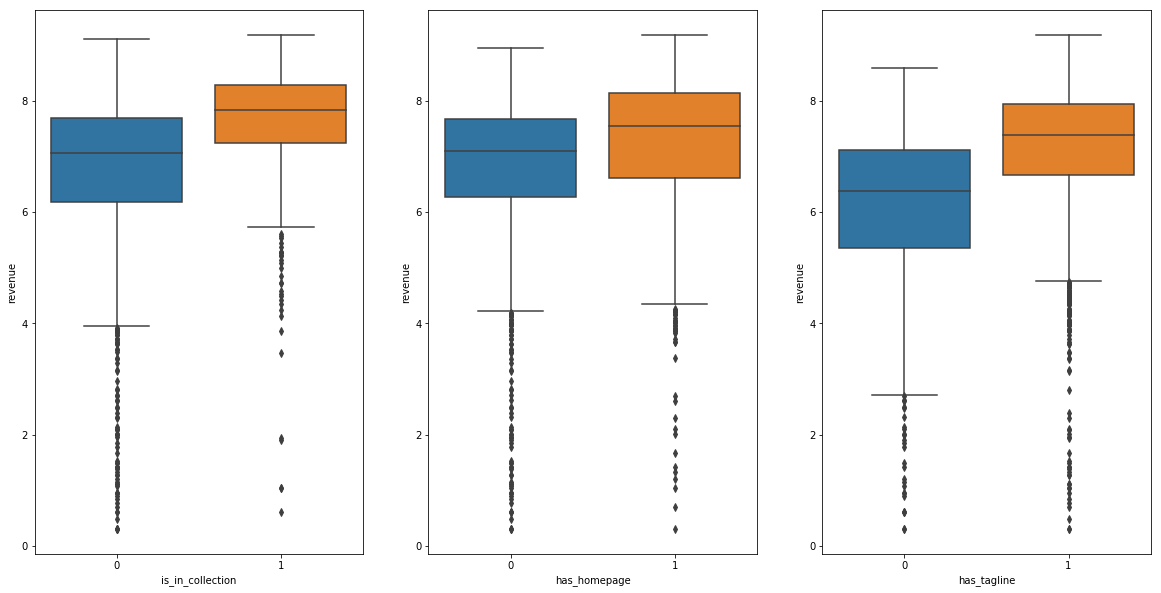

In [285]:
# Plotting new variables against target variable
new_vars = ['is_in_collection','has_homepage','has_tagline']

f, axes = plt.subplots(1,3,figsize = (20,10),sharex=True)
for i,feature in zip(axes.flat, new_vars):
    sns.boxplot(data=train_df, x =feature, y = np.log10(train_df['revenue']+1), ax = i )
# there is some difference but is it significant.

#### Performing stundent test 

In [286]:
with_collection = train_df.loc[train_df.is_in_collection == 1,['revenue']]
without_collection = train_df.loc[train_df.is_in_collection == 0,['revenue']]

with_homepage = train_df.loc[train_df.has_homepage == 1,['revenue']]
without_homepage = train_df.loc[train_df.has_homepage == 0,['revenue']]

with_tagline = train_df.loc[train_df.has_tagline == 1,['revenue']]
without_tagline = train_df.loc[train_df.has_tagline == 0,['revenue']]

In [287]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(np.log10(with_collection +1), np.log10(without_collection + 1))
print('for collection ','z-score: ',stat,' p-value: ',p)
stat, p = ttest_ind(np.log10(with_homepage +1), np.log10(without_homepage + 1))
print('for homepage ','z-score: ',stat,' p-value: ',p)
stat, p = ttest_ind(np.log10(with_tagline +1), np.log10(without_tagline + 1))
print('for tagline ','z-score: ',stat,' p-value: ',p)

for collection  z-score:  [14.53372778]  p-value:  [2.68028467e-46]
for homepage  z-score:  [7.91866596]  p-value:  [3.35156036e-15]
for tagline  z-score:  [18.46534862]  p-value:  [3.41426109e-72]


  #### fixing null values columns and featuere engenering 

In [288]:
# genre column
genre_1 = list()
n_genre = list()
genre = list()

for i in train_df.genres:
    i = str(i)
    parse = re.findall("'name': ('+\w+\s*\w*'+)",i)
    if not parse:
        parse.append('Unkown')
    # adding number of genres for each movie
    if parse[0] == 'Unkown':
        n_genre.append(0)
    else:
        n_genre.append(len(parse))
    genre_1.append(parse[0].replace("'",""))
    genre.append(','.join(parse).replace("'",""))

In [289]:
# testing null values
na_tot = list()
for i in genre:
    if i == 'Unkown':
        na_tot.append(1)
sum(na_tot)/len(train_df)

0.0023333333333333335

In [290]:
#removing not needed column
#train_df.drop(columns=['genres','genres_parsed'],inplace=True)
#train_df.drop(columns=['belongs_to_collection','homepage'], inplace=True)
train_df['genres_1'] = genre_1
train_df['n_genre'] = n_genre
train_df.genres = genre

In [291]:
#Keywords 
total_keywords = list()
first_keyword = list()
keywords = list()
for i in train_df.Keywords:
    i = str(i)
    parse = re.findall("'name': ('+\w+\s*\w*|\d*\s*\w*|\d*'+)",i )
    if not parse:
        parse.append('no_keyword')
    if parse[0] =='no_keyword':
        total_keywords.append(0)
    else:
        total_keywords.append(len(parse))
    first_keyword.append(parse[0].replace("'",""))
    keywords.append(','.join(parse).replace("'",""))


In [293]:
train_df['total_keywords'] = total_keywords
train_df['first_keyword'] = first_keyword
train_df.Keywords = keywords

In [265]:
#production companies
total_prod_companies = list()
first_prod_company = list()
production_companies = list()
for i in train_df.production_companies:
    i = str(i)
    parse = re.findall("'name': ('+\w+\s*\w*|\d*\s*\w*|\d*'+)",i )
    if not parse:
        parse.append('no_prod_company')
    if parse[0] == 'no_prod_company':
        total_prod_companies.append(0)
    else: total_prod_companies.append(len(parse))
    
    first_prod_company.append(parse[0].replace("'",""))
    production_companies.append(','.join(parse).replace("'",""))


In [296]:
train_df['total_prod_companies'] = total_prod_companies
train_df['first_prod_company'] = first_prod_company
train_df.production_companies = production_companies

In [297]:
#adding top 7 companies field 
is_top_production = list()
for i in train_df.production_companies:
    i = str(i)
    if re.search('Warner|Universal|Columbia|Walt Disney|Marvel|Paramount|Century Fox|DreamWorks|Lucasfilm|Pixar',i):
        is_top_production.append(1)
    else:
        is_top_production.append(0)
train_df['is_top_production'] = is_top_production

In [298]:
#production countries 
production_countries = list()
total_prod_countries = list()
first_prod_country= list()
for parse in train_df.production_countries:
    
    parse = str(parse)
    parse = re.findall("'name': ('+\w+\s*\w*\s*\w*\s*\w*'+)",parse)
    if not parse:
        parse.append('no_prod_country')
    if parse[0] == 'no_prod_country':
        total_prod_countries.append(0)
    else:
        total_prod_countries.append(len(parse))
    first_prod_country.append(parse[0].replace("'",""))
    production_countries.append(','.join(parse).replace("'",""))



In [300]:
train_df['total_prod_countries'] = total_prod_countries
train_df['first_prod_country'] = first_prod_country
train_df.production_countries = production_countries

In [301]:
train_df.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,has_tagline,genres_1,n_genre,total_keywords,first_keyword,total_prod_companies,first_prod_company,is_top_production,total_prod_countries,first_prod_country
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,no_homepage,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,1,Comedy,1,4,time travel,3,Paramount Pictures,1,1,United States of America
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",no_homepage,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,1,Comedy,4,4,coronation,1,Walt Disney,1,1,United States of America
2,3,NaN,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,1,Drama,1,12,jazz,3,Bold Films,0,1,United States of America
3,4,NaN,1200000,"Thriller,Drama",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,Thriller,2,7,mystery,0,no_prod_company,0,1,India
4,5,NaN,0,"Action,Thriller",no_homepage,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,Action,2,0,no_keyword,0,no_prod_company,0,1,South Korea
5,6,NaN,8000000,"Animation,Adventure,Family",no_homepage,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,0,Animation,3,0,no_keyword,0,no_prod_company,0,0,no_prod_country
6,7,NaN,14000000,"Horror,Thriller",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,1,Horror,2,0,no_keyword,2,Ghost House,0,2,United States of America
7,8,NaN,0,Documentary,no_homepage,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1,Documentary,1,7,journalism,0,no_prod_company,0,0,no_prod_country
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"Action,Comedy,Music,Family,Adventure",no_homepage,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,1,Action,5,4,island,3,Walt Disney,1,1,United States of America
9,10,NaN,6000000,"Comedy,Music",no_homepage,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,...,1,Comedy,2,2,mockumentary,1,Castle Rock,0,1,United States of America
